# Ising Model

The Ising model is a mathematical model used in statistical mechanics to study phase transitions in physical systems, particularly in magnetism. It was proposed by the physicist Ernst Ising in 1925 to describe the behaviour of magnetic spins in a lattice.

In the Ising model, each lattice site can be in one of two states, typically represented as "up" or "down" spins. The interactions between neighbouring spins are taken into account, described by an energy function that depends on the alignment of neighbouring spins. When spins are aligned, the energy is lowered, while misaligned spins increase the energy.

The energy function (hamiltonian) is given by,

$$H = - J \sum\limits_{\langle i, j \rangle} s_i s_j - h \sum\limits_i s_i$$

where,

$J$ represents a constant specifying the strength of interaction,

$h$ represents the magnitude of the external magnetic field applied,

$s_i$ represents the spin of the $i^{th}$ lattice point

In [1]:
import numpy as np
from itertools import product
from matplotlib import pyplot as plt
import scienceplots

# Default configuration for matplotlib
plt.style.use(["science", "ieee", "grid"])
plt.rcParams["figure.figsize"] = (10, 5)

# Configuration for numpy prints
np.set_printoptions(formatter={"int": "{:+}".format})

## Lattice configurations

1D Lattice structure with 4 lattice points: 
$$\boxed{s_0}\boxed{s_1}\boxed{s_2}\boxed{s_3}$$
where, $s_i \in \{+, -\}$

In [2]:
possible_spins = [+1, -1]
lattice_points = 4  # Number of lattice points

T = 0.1 # Absolute temperature

# Determining all the possible lattice configurations
configurations = np.array(list(product(possible_spins, repeat=lattice_points)))

for i in range(len(configurations)):
    print(configurations[i])

[+1 +1 +1 +1]
[+1 +1 +1 -1]
[+1 +1 -1 +1]
[+1 +1 -1 -1]
[+1 -1 +1 +1]
[+1 -1 +1 -1]
[+1 -1 -1 +1]
[+1 -1 -1 -1]
[-1 +1 +1 +1]
[-1 +1 +1 -1]
[-1 +1 -1 +1]
[-1 +1 -1 -1]
[-1 -1 +1 +1]
[-1 -1 +1 -1]
[-1 -1 -1 +1]
[-1 -1 -1 -1]


## Energy values for each lattice configuration

$$E_r = \frac{1}{N} \left[- J \sum\limits_{\langle i, j \rangle} s_i s_j - h \sum\limits_i s_i \right]$$

For our numerical computation,
$J = 1$ and $h = 0.1$

In [3]:
# Function to calculate the absolute energy of a configuration
def absolute_energy(configurations, J, h):
    H = np.zeros(len(configurations))

    for i in range(len(configurations)):
        for j in range(len(configurations[i])):
            H[i] -= (
                J * configurations[i][j - 1] * configurations[i][j]
                + h * configurations[i][j]
            )

    return H / len(configurations)


J = 1
h = 0.1

energy = absolute_energy(configurations, J, h)

for i in range(len(configurations)):
    print(f"{configurations[i]} \t {energy[i]:+.3f}")

[+1 +1 +1 +1] 	 -0.275
[+1 +1 +1 -1] 	 -0.013
[+1 +1 -1 +1] 	 -0.013
[+1 +1 -1 -1] 	 +0.000
[+1 -1 +1 +1] 	 -0.013
[+1 -1 +1 -1] 	 +0.250
[+1 -1 -1 +1] 	 +0.000
[+1 -1 -1 -1] 	 +0.013
[-1 +1 +1 +1] 	 -0.013
[-1 +1 +1 -1] 	 +0.000
[-1 +1 -1 +1] 	 +0.250
[-1 +1 -1 -1] 	 +0.013
[-1 -1 +1 +1] 	 +0.000
[-1 -1 +1 -1] 	 +0.013
[-1 -1 -1 +1] 	 +0.013
[-1 -1 -1 -1] 	 -0.225


## Partition function

$$\mathcal{Z} = \sum\limits_r \exp(- \beta E_r)$$

where, $\beta = \frac{1}{k_B T}, k_B = 1$

In [4]:
# Boltzmann constant
k = 1

# Function to calculate the partition function
def partition_function(configurations, T):
    energy = absolute_energy(configurations, J, h)

    Z = 0
    for i in range(len(configurations)):
        Z += np.exp(-energy[i] / (k * T))

    return Z


print("Partition Function:", partition_function(configurations, T))

Partition Function: 37.35711914040018


## Probabilities for each lattice configuration

$$P_r = \frac{\exp(- \beta E_r)}{\mathcal{Z}}$$

In [5]:
# Function to calculate the probabilities for each configuration
def configurations_probabilities(configurations, T):
    energy = absolute_energy(configurations, J, h)
    Z = partition_function(configurations, T)

    probabilities = np.empty(len(configurations))
    for i in range(len(configurations)):
        probabilities[i] = np.exp(-energy[i] / (k * T)) / Z

    return probabilities


probabilities = configurations_probabilities(configurations, T)

for i in range(len(configurations)):
    print(f"{configurations[i]} \t {probabilities[i]:+.3f}")

[+1 +1 +1 +1] 	 +0.419
[+1 +1 +1 -1] 	 +0.030
[+1 +1 -1 +1] 	 +0.030
[+1 +1 -1 -1] 	 +0.027
[+1 -1 +1 +1] 	 +0.030
[+1 -1 +1 -1] 	 +0.002
[+1 -1 -1 +1] 	 +0.027
[+1 -1 -1 -1] 	 +0.024
[-1 +1 +1 +1] 	 +0.030
[-1 +1 +1 -1] 	 +0.027
[-1 +1 -1 +1] 	 +0.002
[-1 +1 -1 -1] 	 +0.024
[-1 -1 +1 +1] 	 +0.027
[-1 -1 +1 -1] 	 +0.024
[-1 -1 -1 +1] 	 +0.024
[-1 -1 -1 -1] 	 +0.254


## Average Energy

$$\langle E \rangle = \sum\limits_r E_r P_r$$

In [6]:
# Function to calculate the average energy
def average_energy(configurations, T):
    energy = absolute_energy(configurations, J, h)
    probabilities = configurations_probabilities(configurations, T)

    E = 0
    for i in range(len(configurations)):
        E += energy[i] * probabilities[i]

    return E


print("Average Energy:", average_energy(configurations, T))

Average Energy: -0.1715323493083448


### Variation of average energy with absolute temperature

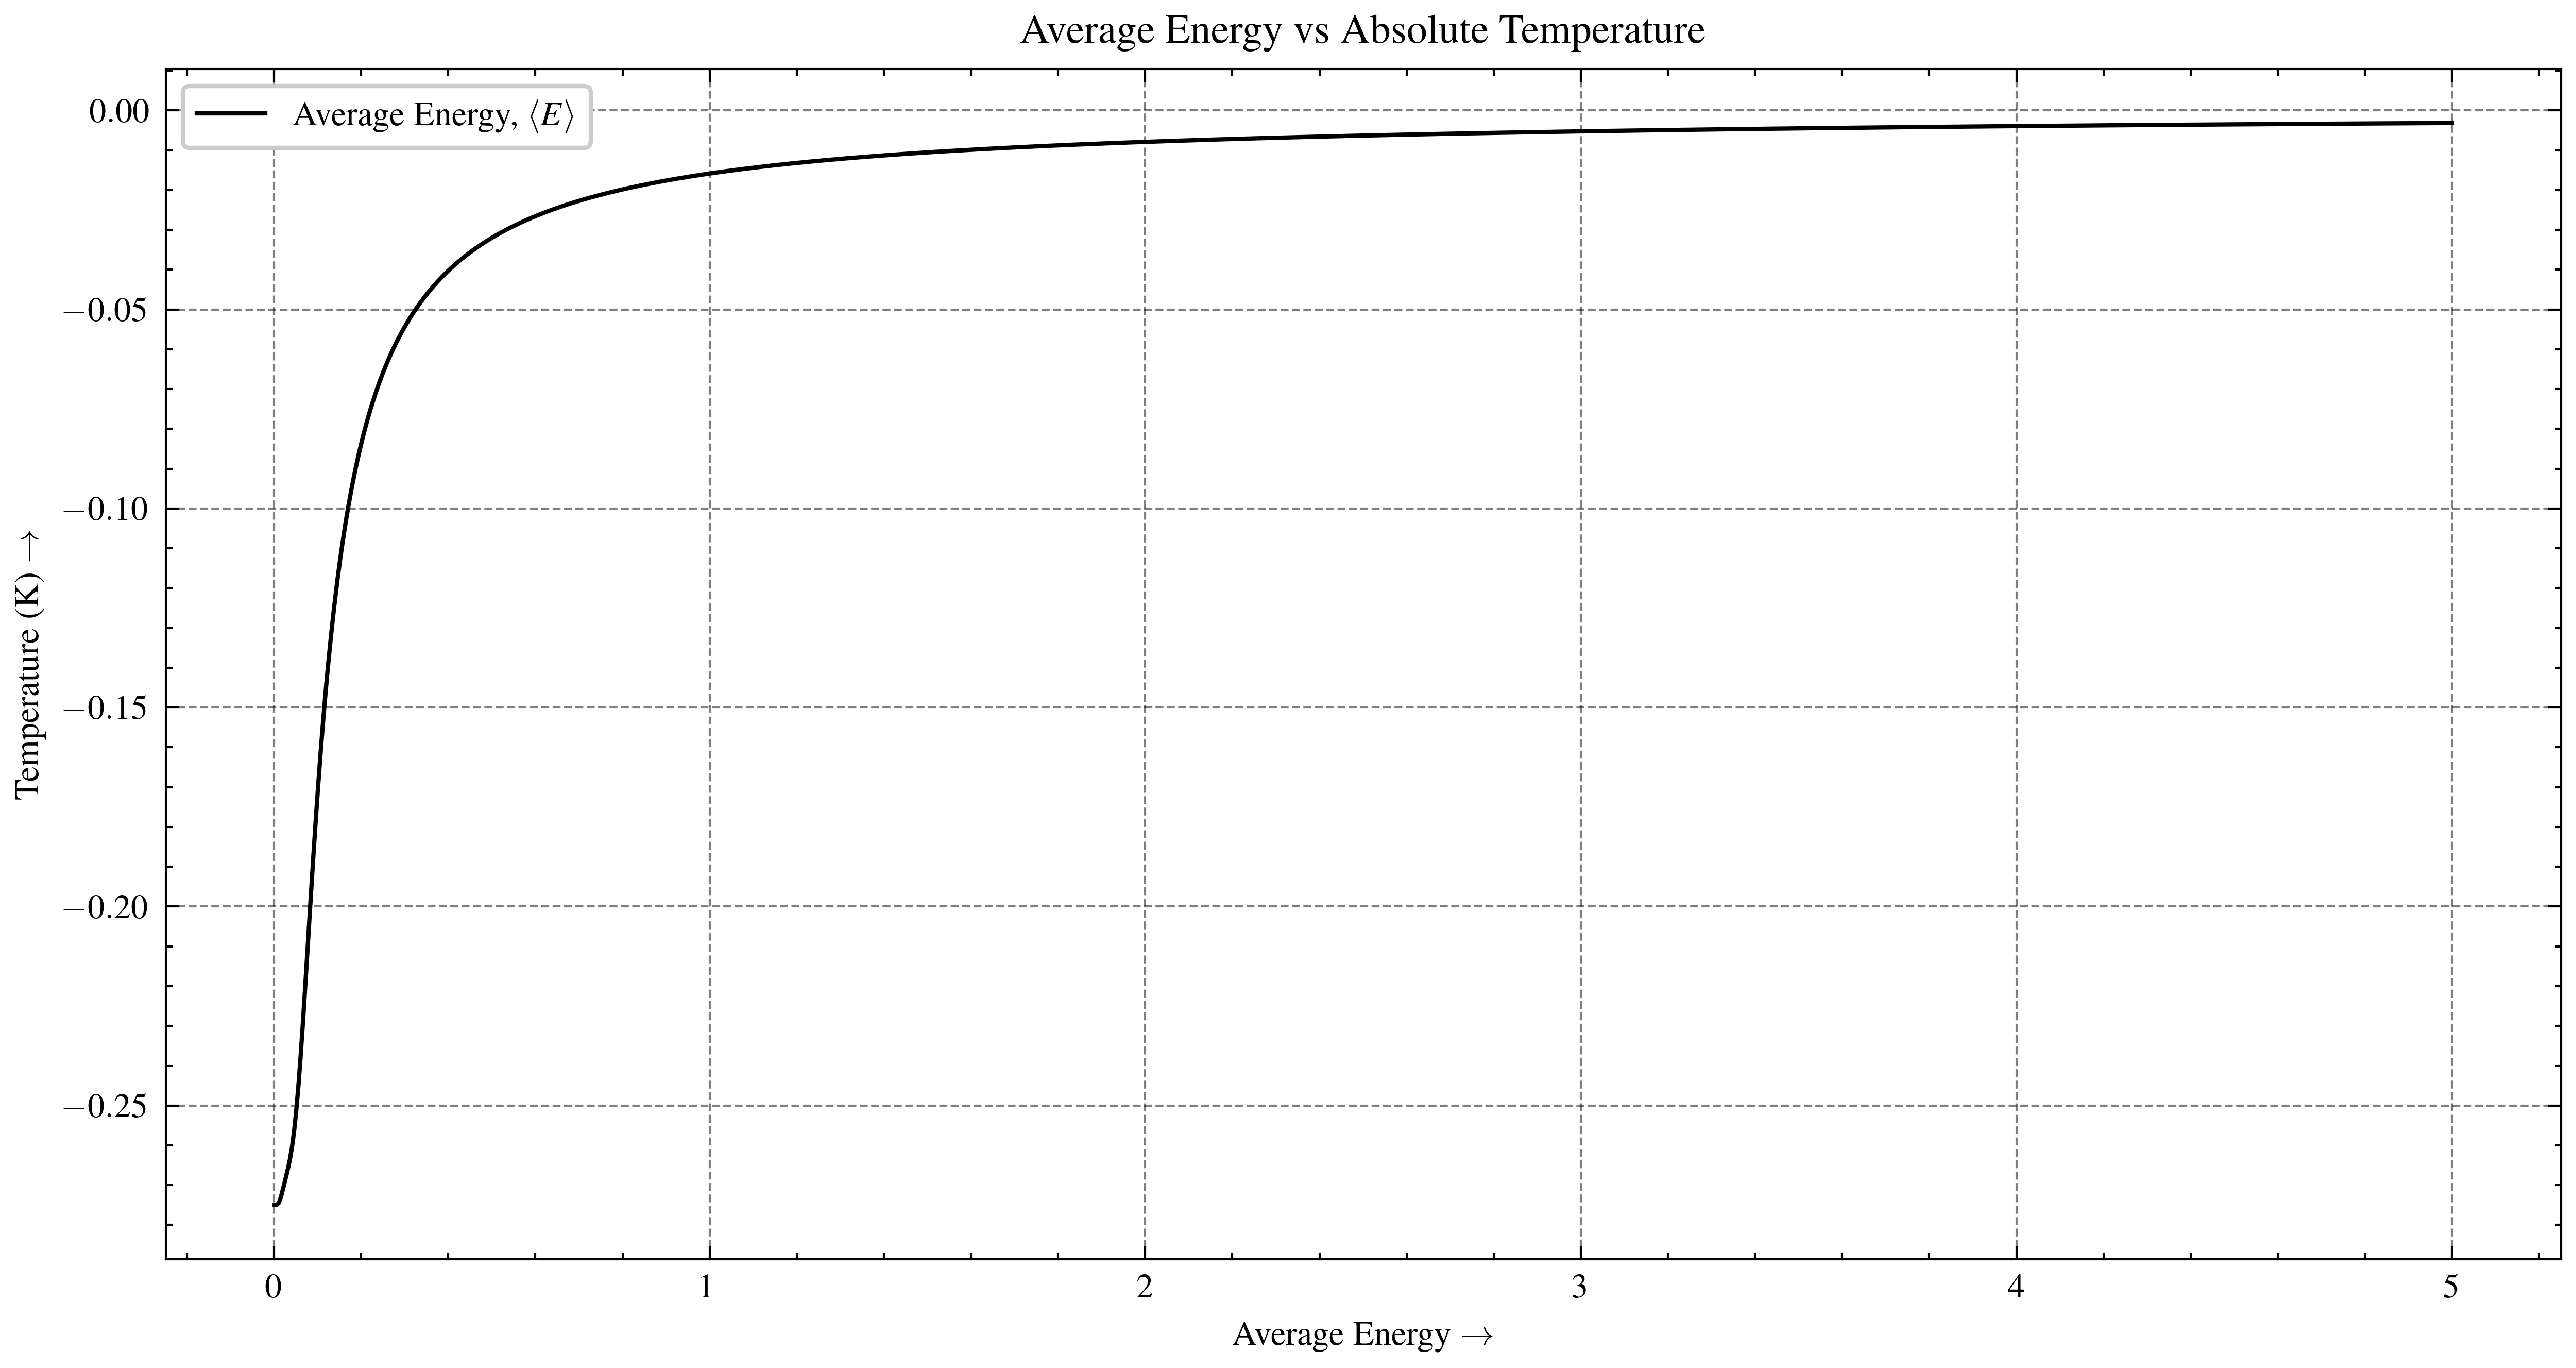

In [7]:
T_i = 1e-3
T_f = 5
n = 1000

TT = np.linspace(T_i, T_f, n)

EE = np.empty(len(TT))

for i in range(len(TT)):
    EE[i] = average_energy(configurations, TT[i])

plt.plot(TT, EE, label="Average Energy, $\\langle E \\rangle$")
plt.title("Average Energy vs Absolute Temperature")
plt.xlabel("Average Energy $\\rightarrow$")
plt.ylabel("Temperature (K) $\\rightarrow$")
plt.legend()
plt.show()

## Magnetization values for each lattice configuration

$$M_r = \frac{1}{N}\sum\limits_i s_i$$

In [8]:
# Function to calculate the absolute magnetisation for each configuration
def absolute_magnetization(configurations):
    M = np.empty(len(configurations))

    for i in range(len(configurations)):
        M[i] = np.sum(configurations[i])

    return M / len(configurations)


M = absolute_magnetization(configurations)

for i in range(len(configurations)):
    print(f"{configurations[i]} \t {M[i]:+.3f}")

[+1 +1 +1 +1] 	 +0.250
[+1 +1 +1 -1] 	 +0.125
[+1 +1 -1 +1] 	 +0.125
[+1 +1 -1 -1] 	 +0.000
[+1 -1 +1 +1] 	 +0.125
[+1 -1 +1 -1] 	 +0.000
[+1 -1 -1 +1] 	 +0.000
[+1 -1 -1 -1] 	 -0.125
[-1 +1 +1 +1] 	 +0.125
[-1 +1 +1 -1] 	 +0.000
[-1 +1 -1 +1] 	 +0.000
[-1 +1 -1 -1] 	 -0.125
[-1 -1 +1 +1] 	 +0.000
[-1 -1 +1 -1] 	 -0.125
[-1 -1 -1 +1] 	 -0.125
[-1 -1 -1 -1] 	 -0.250


## Average magnetization

$$\langle M \rangle = \sum\limits_r M_r P_r$$

In [9]:
# Function to calculate the average magnetisation
def average_magnetization(configurations, T):
    magnetization = absolute_magnetization(configurations)
    probabilities = configurations_probabilities(configurations, T)

    M = 0
    for i in range(len(configurations)):
        M += magnetization[i] * probabilities[i]

    return M


print("Average magnetization:", average_magnetization(configurations, T))

Average magnetization: 0.04454438204788995


### Variation of average magnetization with absolute temperature

In [10]:
T_i = 1e-3
T_f = 3
n = 1000

TT = np.linspace(T_i, T_f, n)

MM = np.empty(len(TT))

for i in range(len(TT)):
    MM[i] = average_magnetization(configurations, TT[i])

plt.plot(TT, MM, label="Average magnetization$, \\langle M \\rangle$")
plt.title("Average magnetization vs Absolute Temperature")
plt.xlabel("Average magnetization $\\rightarrow$")
plt.ylabel("Temperature (K) $\\rightarrow$")
plt.legend()
plt.show()